# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
pip install keras==3.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
pip install keras-layer-normalization

  Preparing metadata (setup.py) ... done
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=6532ce22fca18fb59007780539116bb6011f61d3f3405eac36d60e8b70cf403d
  Stored in directory: /root/.cache/pip/wheels/ed/3a/4b/21db23c0cc56c4b219616e181f258eb7c57d36cc5d056fae9a
Successfully built keras-layer-normalization


In [ ]:
pip install tensorflow==2.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.0
    Uninstalling keras-3.2.0:
      Successfully uninstalled keras-3.2.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

In [ ]:
pip install opencv-python


In [ ]:
!pip install opencv-python


In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import os, cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop, SGD, Adamax
from keras_layer_normalization import LayerNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns
import random
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
os.listdir('/content/drive/MyDrive/dataset/CitrusLeafDiseaseImage')

['Melanose', 'Black spot', 'Healthy', 'Greening', 'Canker']

In [ ]:
DATADIR = r'/content/drive/MyDrive/dataset/CitrusLeafDiseaseImage'

In [ ]:
CATEGORIES = ['Black spot', 'Canker', 'Greening', 'Healthy', 'Melanose']
DATADIR = r'/content/drive/MyDrive/dataset/CitrusLeafDiseaseImage'
IMAGE_SIZE = (128, 128)  # Resize images to 128x128 (adjust as needed)

def load_data():
    data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, 0)  # Load image in grayscale
            if img_array is not None:
                img_array = cv2.resize(img_array, IMAGE_SIZE)  # Resize image
                img_array = img_array / 255.0  # Normalize pixel values
                data.append([img_array, class_num])

    return data

# Load and resize data
data = load_data()

# Separate images and labels
images, labels = zip(*data)
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print the shape of the splits
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

Training set: (485, 128, 128), Testing set: (122, 128, 128)


In [ ]:
X_train_Gabor  = X_train
X_test_Gabor = X_test

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print("After adding color channel")
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

After adding color channel
X_train shape:  (485, 128, 128, 1)
X_test shape:  (122, 128, 128, 1)


In [ ]:
import os
data_path ='/content/drive/MyDrive/dataset/CitrusLeafDiseaseImage' #Extracting images from directory
data_dir_list = os.listdir(data_path)

num_epoch=200

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-Melanose

Loaded the images of dataset-Black spot

Loaded the images of dataset-Healthy

Loaded the images of dataset-Greening

Loaded the images of dataset-Canker



(607, 48, 48, 3)

In [ ]:
num_classes = 5 #label the data

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
names = ['Melanose','Black spot','Healthy','Greening','Canker']

def getLabel(id):
    return ['Melanose','Black spot','Healthy','Greening','Canker'][id]

# Spliting Data

In [ ]:
import tensorflow as tf  # Import TensorFlow

Y = tf.keras.utils.to_categorical(labels, num_classes)  # Use the correct import
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

# HOG Features

In [ ]:
from skimage.transform import resize
from skimage.feature import hog

In [ ]:
from skimage.color import rgb2gray

(-0.5, 47.5, 47.5, -0.5)

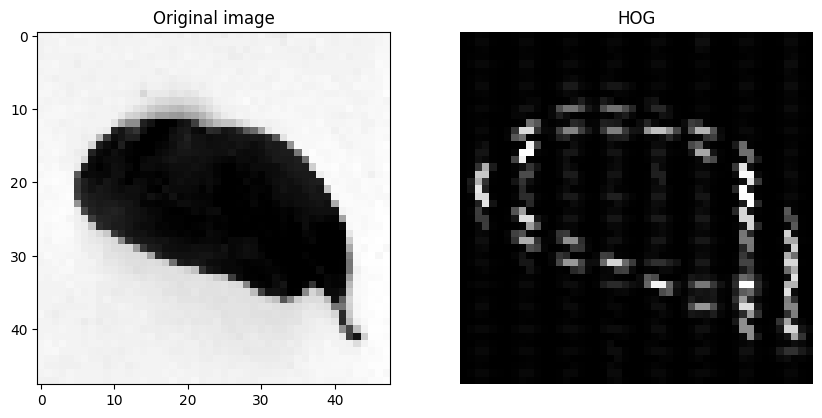

In [ ]:

plt.figure(figsize=(10, 10))


plt.subplot(1,2,1)
img = random.choice(X_train)
# first image needs to be resized before passing it to HOG descriptor
resized_img =  resize(img, (128, 64))
plt.title("Original image")
plt.imshow(img[:,:,0], cmap='gray')
resized_img = rgb2gray(resized_img)
fd, hog_image = hog(
    resized_img,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True
)
plt.subplot(1,2,2)
plt.title("HOG")
plt.imshow(resize(hog_image, (48, 48)), cmap='gray')
plt.axis('off')

In [ ]:
def Create_Hog_features(data):
    Feature_data = np.zeros((len(data),48,48))

    for i in range(len(data)):
        img = data[i]
        resized_img = resize(img, (128, 64))
        fd, hog_image = hog(
            resized_img,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=True,
            channel_axis=-1

        )
        Feature_data[i] = resize(hog_image, (48, 48))
    return Feature_data

# #Creating Feature Vectors for Training and Testing

In [ ]:
!pip install --upgrade scikit-image


In [ ]:
import skimage
print(skimage.__version__)

0.24.0


In [ ]:
Feature_X_train = Create_Hog_features(X_train)
Feature_X_train.shape

(485, 48, 48)

(-0.5, 47.5, 47.5, -0.5)

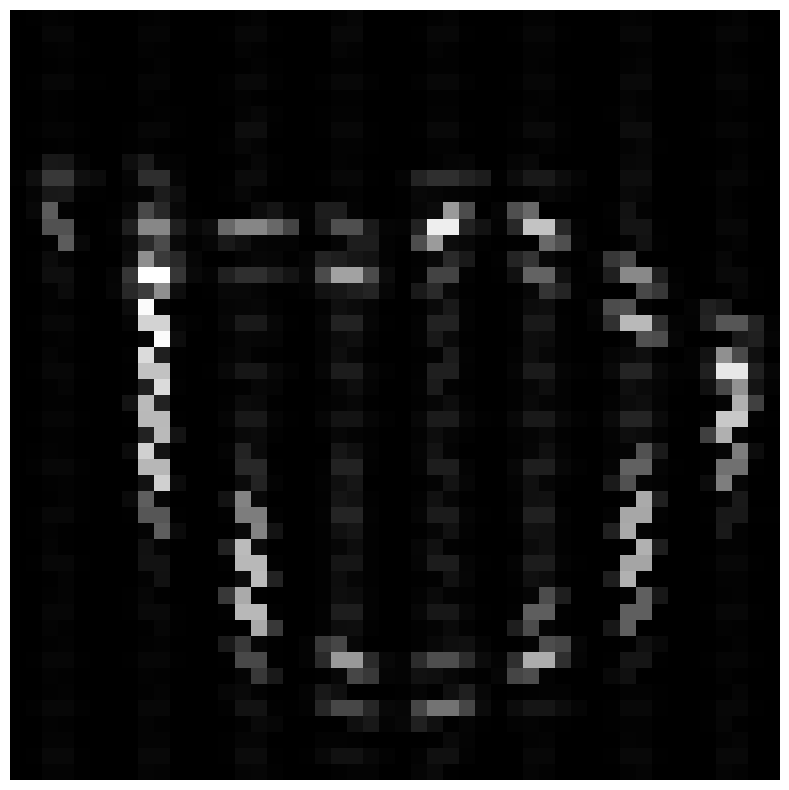

In [ ]:
plt.imshow(random.choice(Feature_X_train), cmap='gray')
plt.axis('off')

In [ ]:
# doing same for test data
Feature_X_test = Create_Hog_features(X_test)
Feature_X_test.shape

(122, 48, 48)

(-0.5, 47.5, 47.5, -0.5)

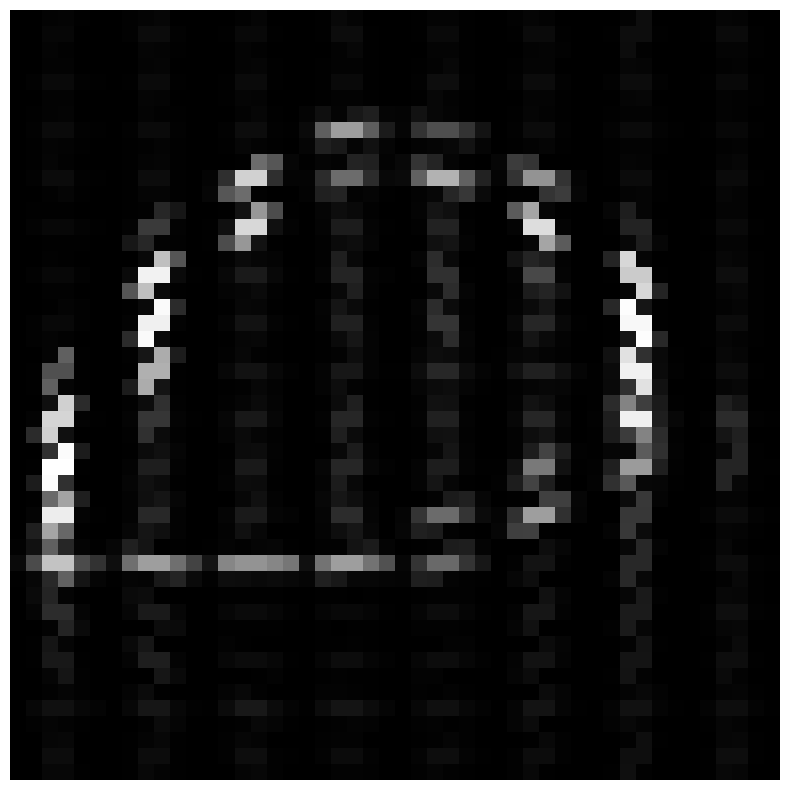

In [ ]:
plt.imshow(random.choice(Feature_X_test), cmap='gray')
plt.axis('off')

In [ ]:
# Again adding color channel as it got removed while converting img to hog img
X_train_HOG = np.expand_dims(Feature_X_train, axis=3)
X_test_HOG = np.expand_dims(Feature_X_test, axis=3)

print("After adding color channel")
print("X_train_HOG shape: ", X_train_HOG.shape)
print("X_test_HOG shape: ", X_test_HOG.shape)

After adding color channel
X_train_HOG shape:  (485, 48, 48, 1)
X_test_HOG shape:  (122, 48, 48, 1)


In [ ]:
print("X_train_HOG shape: ", X_train_HOG.shape)
print("y_train shape: ", y_train.shape)
print("X_test_HOG shape: ", X_test_HOG.shape)
print("y_test shape: ", y_test.shape)

X_train_HOG shape:  (485, 48, 48, 1)
y_train shape:  (485, 5)
X_test_HOG shape:  (122, 48, 48, 1)
y_test shape:  (122, 5)


# LBP

In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
        for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values
            img1_vector = np.delete(img1_vector,4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n<center assign 0
            else:                                    # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

(-0.5, 47.5, 47.5, -0.5)

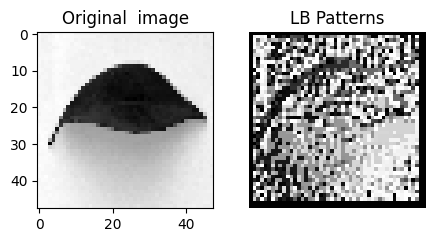

In [ ]:
plt.figure(figsize = (5,5))

plt.subplot(1,2,1)
img = random.choice(X_train)
plt.title("Original  image")
plt.imshow(img[:,:,0], cmap='gray')

plt.subplot(1,2,2)
plt.title("LB Patterns")
imgLBP=Binarypattern(img[:,:,0])             # calling the LBP function using gray image
plt.imshow(imgLBP, cmap='gray')
plt.axis('off')

# Creating Feature Vectors for training and testing

In [ ]:
X_train.shape

(485, 48, 48, 3)

In [ ]:
def create_LBP_features(data):
    Feature_data = np.zeros(data.shape)

    for i in range(len(data)):
        img = data[i]
        imgLBP=Binarypattern(img)
        Feature_data[i] = imgLBP

    return Feature_data

In [ ]:
LBP_X_train = create_LBP_features(X_train)

In [ ]:
LBP_X_train.shape

(485, 48, 48, 3)

In [ ]:
LBP_X_test = create_LBP_features(X_test)
LBP_X_test.shape

(122, 48, 48, 3)

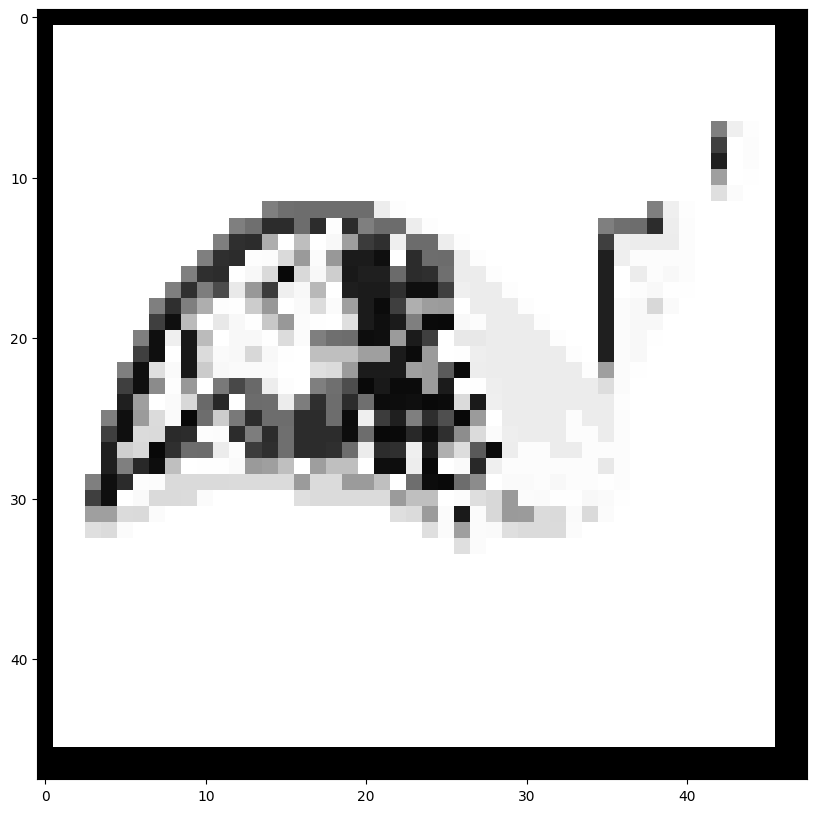

In [ ]:
img = random.choice(LBP_X_test)
plt.imshow(img[:,:,0], cmap='gray')

In [ ]:
LBP_X_test = create_LBP_features(X_test)
LBP_X_test.shape

(122, 48, 48, 3)


# Gabor Filters

In [ ]:
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get half size
    d = K_size // 2

    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)

    # each value
    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d

            # degree -> radian
            theta = angle / 180. * np.pi

            # get kernel x
            _x = np.cos(theta) * px + np.sin(theta) * py

            # get kernel y
            _y = -np.sin(theta) * px + np.cos(theta) * py

            # fill kernel
            gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

    # kernel normalization
    gabor /= np.sum(np.abs(gabor))

    return gabor


# Use Gabor filter to act on the image
def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)

    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Use 6 Gabor filters with different angles to perform feature extraction on the image
def Gabor_process(img):
#     print(img.shape)
    # get shape
    H, W = img.shape

    # gray scale
#     gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    #As = [0, 45, 90, 135]
    As = [0,30,60,90,120,150]

    # prepare pyplot
#     plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):

        # gabor filtering
        _out = Gabor_filtering(img, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)


        # add gabor filtered image
        out += _out


    # scale normalization
    out = out /out.max()*255
    out = out.astype(np.uint8)

    return out

In [ ]:
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get half size
    d = K_size // 2

    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)

    # each value
    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d

            # degree -> radian
            theta = angle / 180. * np.pi

            # get kernel x
            _x = np.cos(theta) * px + np.sin(theta) * py

            # get kernel y
            _y = -np.sin(theta) * px + np.cos(theta) * py

            # fill kernel
            gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

    # kernel normalization
    gabor /= np.sum(np.abs(gabor))

    return gabor


# Use Gabor filter to act on the image
def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)

    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Use 6 Gabor filters with different angles to perform feature extraction on the image
def Gabor_process(img):
#     print(img.shape)
    # get shape
    H, W = img.shape

    # gray scale
#     gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    #As = [0, 45, 90, 135]
    As = [0,30,60,90,120,150]

    # prepare pyplot
#     plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):

        # gabor filtering
        _out = Gabor_filtering(img, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)


        # add gabor filtered image
        out += _out
    # scale normalization
    out = out /out.max()*255
    out = out.astype(np.uint8)
    return out

In [ ]:
!pip install tqdm


In [ ]:
X_train.shape

(485, 48, 48, 3)

In [ ]:
!pip install tqdm


In [ ]:
from tqdm import tqdm

def create_Gabor_features(data):
    Feature_data = np.zeros((len(data),128,128,3)) # changed 48 to 128

    for i in tqdm(range(len(data))): # Added progress bar
        img = data[i]
        out = Gabor_process(img)
        out = np.expand_dims(out , axis = 2) # adding color channel
        Feature_data[i] = out/255.00


    return Feature_data

In [ ]:
X_train_Gab=create_Gabor_features(X_train_Gabor)
X_test_Gab=create_Gabor_features(X_test_Gabor)

X_train_Gab.shape , X_test_Gab.shape

  0%|          | 0/485 [00:00<?, ?it/s]<ipython-input-40-a6aae3a202b5>:86: RuntimeWarning: invalid value encountered in divide
  out = out /out.max()*255
<ipython-input-40-a6aae3a202b5>:87: RuntimeWarning: invalid value encountered in cast
  out = out.astype(np.uint8)
100%|██████████| 122/122 [01:27<00:00,  1.40it/s]


((485, 128, 128, 3), (122, 128, 128, 3))

In [ ]:
X_train_Gab.shape

(485, 128, 128, 3)

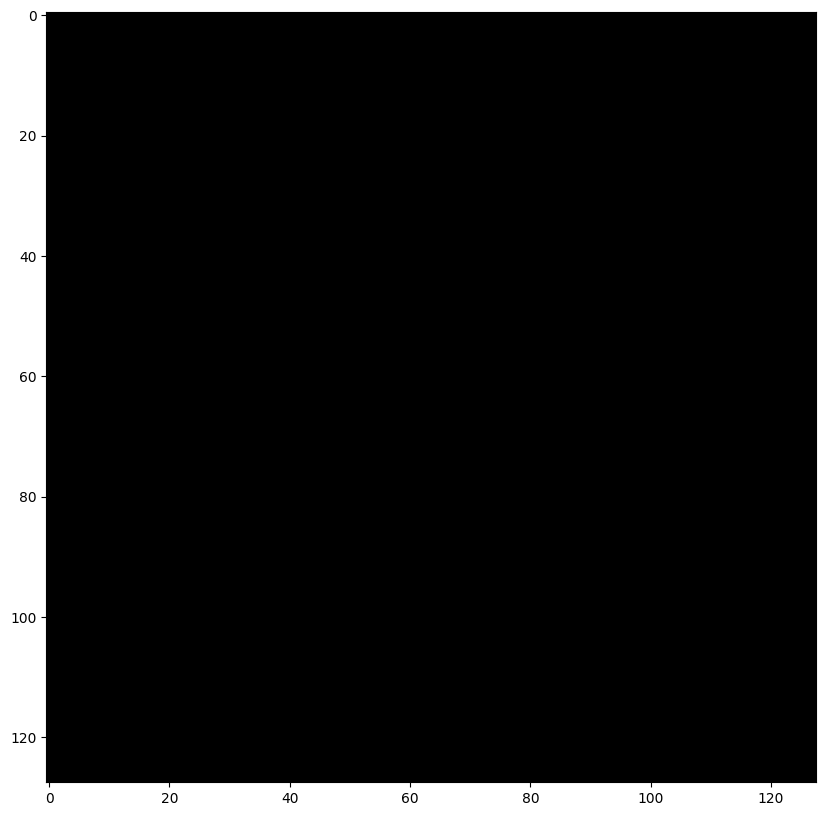

In [ ]:
img = random.choice(X_test_Gab)
plt.imshow(img[:,:,0], cmap='gray')

# k-Fold Cross-Validation

> Add blockquote



In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

# Create Model

In [ ]:
from keras.models import Sequential
model = Sequential()
# Change the input shape to (48, 48, 3) to match your training data
model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
es = EarlyStopping(
    monitor='val_accuracy', min_delta=0.0001, patience=5, verbose=2,
    mode='max', baseline=None, restore_best_weights=True
)
lr = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=2,
    mode='max', min_delta=1e-5, cooldown=0, min_lr=0
)

callbacks = [es, lr]

In [ ]:
# Example of how to create the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                4

# Training Model

In [ ]:
BS = 10
EPOCHS = 150
result = []
scores_loss = []
scores_acc = []
k_no = 0
for Feature_X_train, Feature_X_test in kf.split(x):
    X_Train_ = x[Feature_X_train]
    Y_Train = y[Feature_X_train]
    X_Test_ = x[Feature_X_test]
    Y_Test = y[Feature_X_test]

    file_path = "/kaggle/working/weights_best_"+str(k_no)+".hdf5"
    checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
    early = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]

    hist = model.fit(aug.flow(X_Train_, Y_Train), epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=1)

    model.load_weights(file_path)
    result.append(model.predict(X_Test_))
    score = model.evaluate(X_Test_,Y_Test, verbose=0)
    scores_loss.append(score[0])
    scores_acc.append(score[1])
    k_no+=1

Epoch 1/150
16/16 [==============================] - ETA: 0s - loss: 1.4596 - accuracy: 0.3814
Epoch 1: loss improved from inf to 1.45965, saving model to /kaggle/working/weights_best_0.hdf5
16/16 [==============================] - 4s 225ms/step - loss: 1.4596 - accuracy: 0.3814 - val_loss: 1.4626 - val_accuracy: 0.4262
Epoch 2/150
16/16 [==============================] - ETA: 0s - loss: 1.3619 - accuracy: 0.4062
Epoch 2: loss improved from 1.45965 to 1.36191, saving model to /kaggle/working/weights_best_0.hdf5
16/16 [==============================] - 3s 191ms/step - loss: 1.3619 - accuracy: 0.4062 - val_loss: 1.5561 - val_accuracy: 0.2951
Epoch 3/150
16/16 [==============================] - ETA: 0s - loss: 1.3068 - accuracy: 0.4598
Epoch 3: loss improved from 1.36191 to 1.30680, saving model to /kaggle/working/weights_best_0.hdf5
16/16 [==============================] - 3s 170ms/step - loss: 1.3068 - accuracy: 0.4598 - val_loss: 1.3951 - val_accuracy: 0.3934
Epoch 4/150
16/16 [=======

In [ ]:
print(scores_acc,scores_loss)

[0.7295082211494446, 0.8360655903816223, 0.7851239442825317, 0.8099173307418823, 0.8925619721412659] [0.7157164812088013, 0.44815871119499207, 0.6321722865104675, 0.45233476161956787, 0.37374231219291687]


# Taking Model with Lowest Loost

In [ ]:
value_min = min(scores_loss)
value_index = scores_loss.index(value_min)
print(value_index)

4


In [ ]:
model.load_weights("/kaggle/working/weights_best_"+str(value_index)+".hdf5")

In [ ]:
best_model = model

# Model Evaluation

In [ ]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

Test Loss: 0.25946617126464844
Test accuracy: 0.9016393423080444
(1, 48, 48, 3)


In [ ]:

#predict
y_pred = best_model.predict(X_test)

4/4 [==============================] - 0s 18ms/step


# Visualizing Train,Test--->Accuracy,Loss

<Figure size 1500x1000 with 0 Axes>

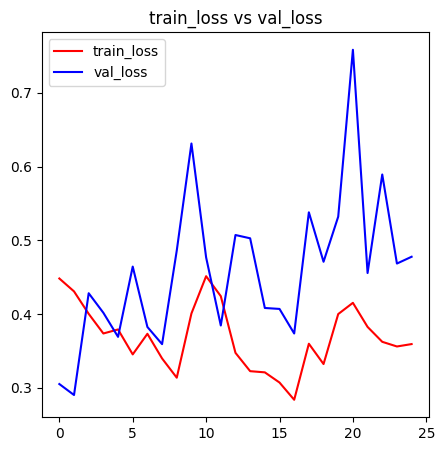

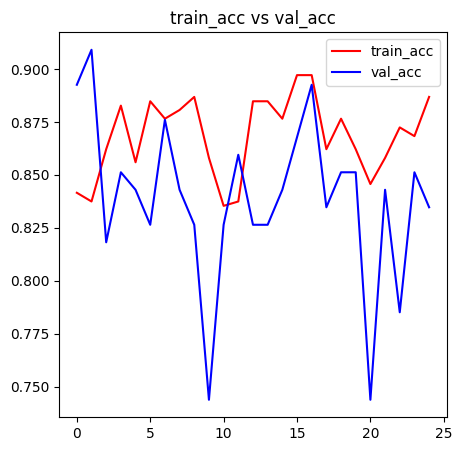

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))
plt.figure(figsize=(5, 5))
plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure(figsize=(5, 5))

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
best_model = model


In [ ]:
best_model.save_weights('model_weights.h5')
best_model.save('model_keras.h5')

# Confusion

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Use 'predict' and then find the class with highest probability
predictions = best_model.predict(X_test)
results = np.argmax(predictions, axis=1)

cm = confusion_matrix(np.where(y_test == 1)[1], results)
#cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis] # Optional normalization

4/4 [==============================] - 0s 32ms/step


In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
label_mapdisgust = ['Melanose','Black spot','Healthy','Greening','Canker']

In [ ]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                     )

In [ ]:
final_cm = cm_df

In [ ]:
final_cm

,Melanose,Black spot,Healthy,Greening,Canker
Melanose,25,1,0,0,0
Black spot,2,5,2,0,0
Healthy,3,0,36,1,0
Greening,1,0,1,11,0
Canker,0,0,0,1,33


# Confusion

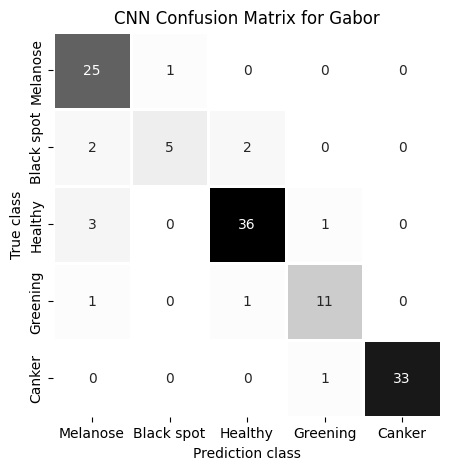

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Confusion Matrix for Gabor')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your model (assuming you've saved it)
model = load_model('model_keras.h5')  # Replace with your actual model filename

# Specify the path to your folder containing images
folder_path = '/content/drive/MyDrive/dataset/CitrusLeafDiseaseImage'  # Replace with your actual folder path

# List all subdirectories in the folder
subdirectories = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Randomly select a subdirectory
random_subdirectory = random.choice(subdirectories)

# List all files in the selected subdirectory
all_files = os.listdir(os.path.join(folder_path, random_subdirectory))

# Filter the list to include only image files (you can add more extensions if needed)
image_files = [f for f in all_files if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Randomly select an image
random_image = random.choice(image_files)

# Load and preprocess the selected image
img_path = os.path.join(folder_path, random_subdirectory, random_image)
img = image.load_img(img_path, target_size=(48, 48))  # Resize to match your model's input shape

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizing if you used this during training

# Predict the class
predictions = model.predict(img_array)

# Decode the prediction (assuming you have a list of class labels)
class_labels = ['Black spot', 'Canker', 'Greening', 'Healthy', 'Melanose']  # Replace with your actual class labels
predicted_class = class_labels[np.argmax(predictions)]

# Display the selected image and the prediction
print(f'Selected image: {random_image}')
print(f'The image belongs to: {predicted_class}')

1/1 [==============================] - 0s 75ms/step
Selected image: Image (59).png
The image belongs to: Greening


1/1 [==============================] - 0s 128ms/step


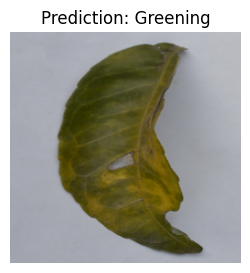

Selected image: Image (29).png
The image belongs to: Greening


In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt  # Importing for image display

# Load your model (assuming you've saved it)
model = load_model('model_keras.h5')  # Replace with your actual model filename

# Specify the path to your folder containing images
folder_path = '/content/drive/MyDrive/dataset/CitrusLeafDiseaseImage'  # Replace with your actual folder path

# List all subdirectories in the folder
subdirectories = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Randomly select a subdirectory
random_subdirectory = random.choice(subdirectories)

# List all files in the selected subdirectory
all_files = os.listdir(os.path.join(folder_path, random_subdirectory))

# Filter the list to include only image files (you can add more extensions if needed)
image_files = [f for f in all_files if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Randomly select an image
random_image = random.choice(image_files)

# Load and preprocess the selected image
img_path = os.path.join(folder_path, random_subdirectory, random_image)
img = image.load_img(img_path, target_size=(48, 48))  # Resize to match your model's input shape

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizing if you used this during training

# Predict the class
predictions = model.predict(img_array)

# Decode the prediction (assuming you have a list of class labels)
class_labels = ['Black spot', 'Canker', 'Greening', 'Healthy', 'Melanose']  # Replace with your actual class labels
predicted_class = class_labels[np.argmax(predictions)]

# Display the selected image and the prediction
plt.figure(figsize=(3, 3))
plt.imshow(image.load_img(img_path))  # Load and display the image
plt.title(f'Prediction: {predicted_class}')  # Display the predicted class as the title
plt.axis('off')  # Hide axes for better display
plt.show()

print(f'Selected image: {random_image}')
print(f'The image belongs to: {predicted_class}')
